Use Functions to show all types of emissions vs temp anomalies

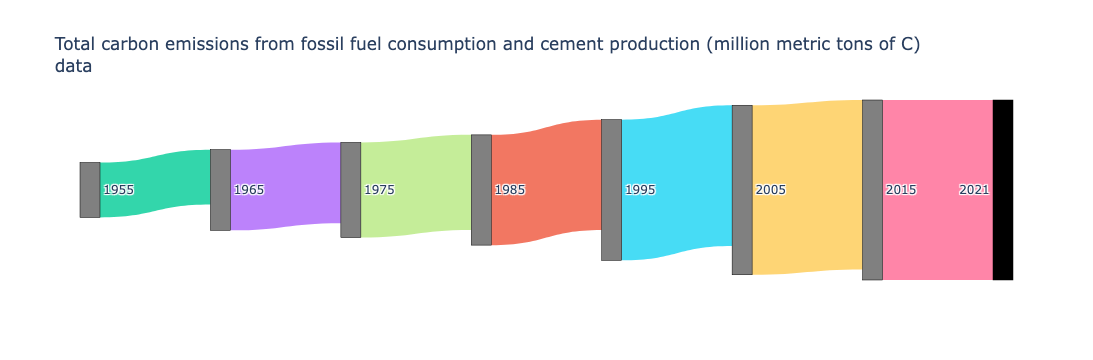

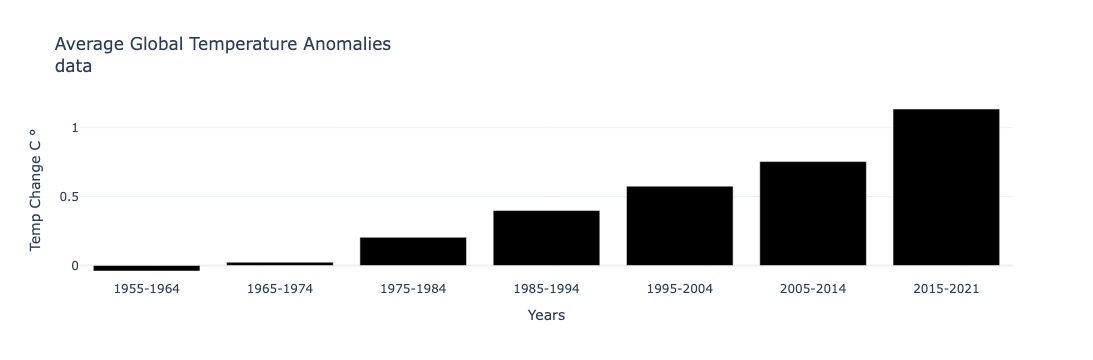

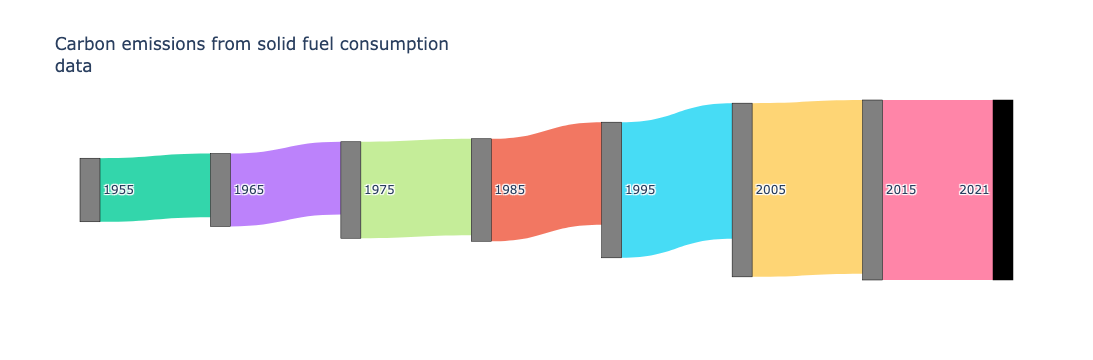

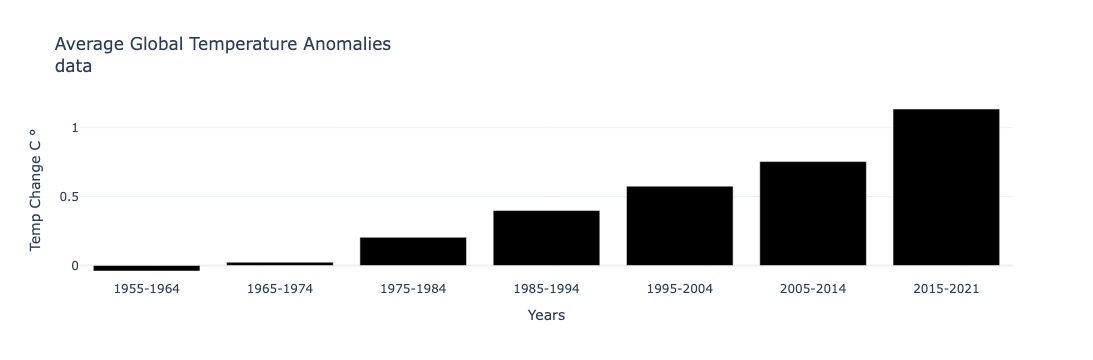

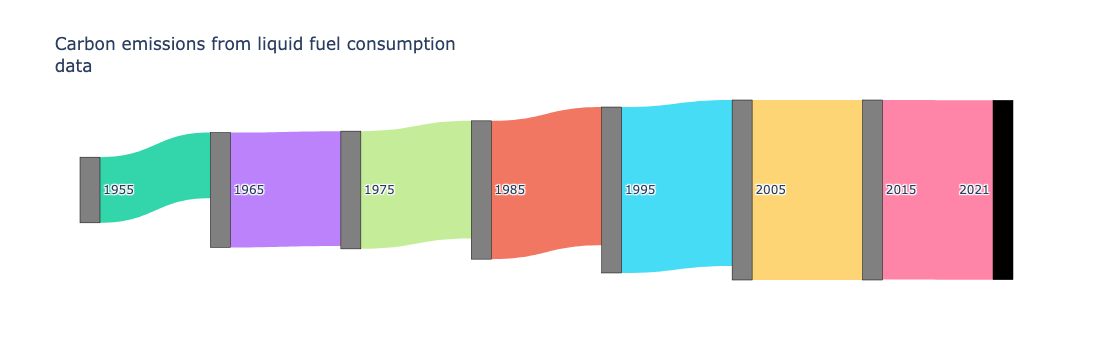

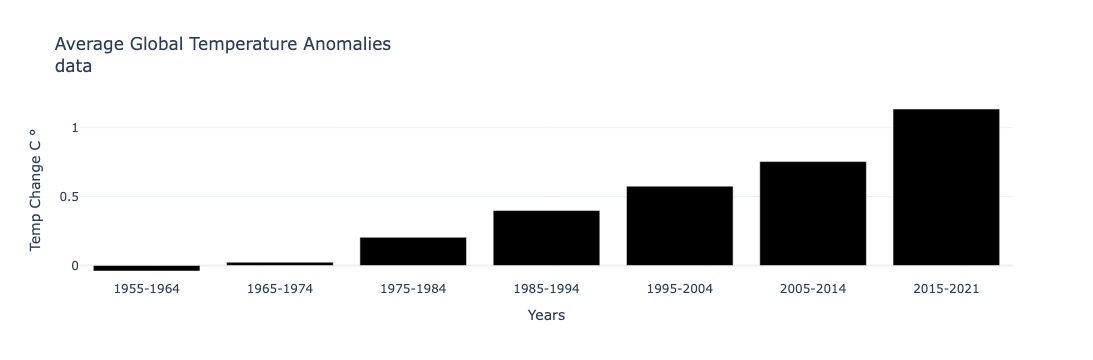

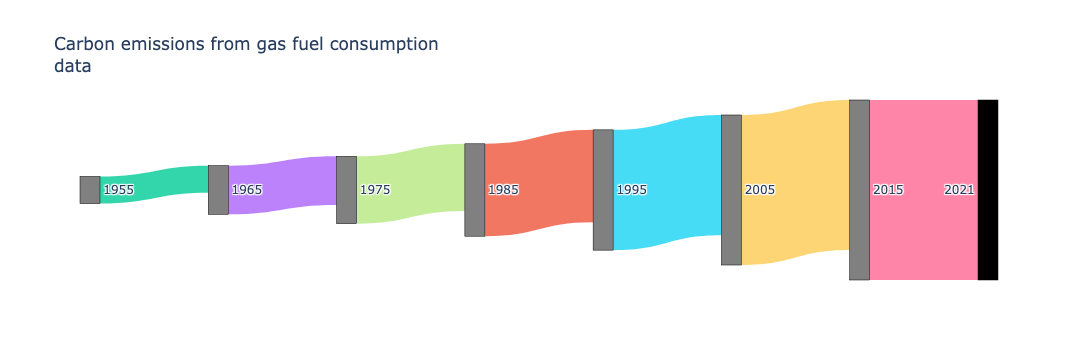

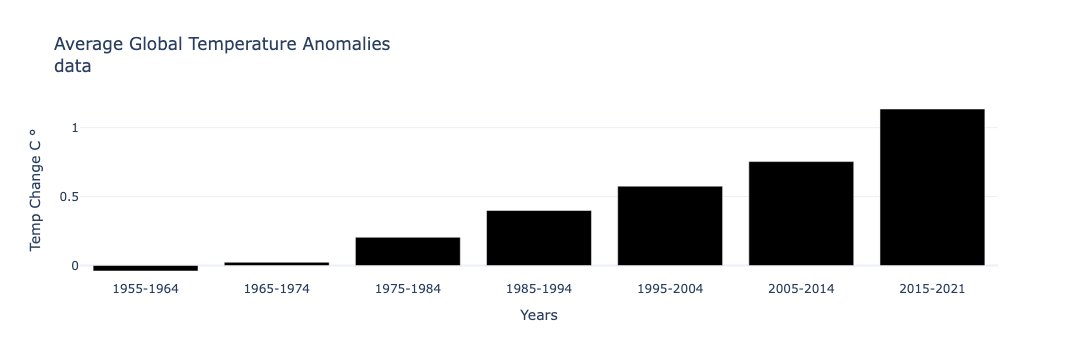

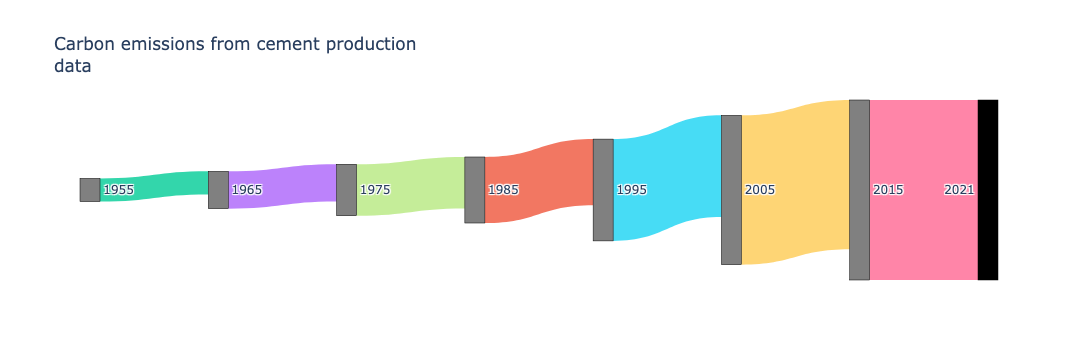

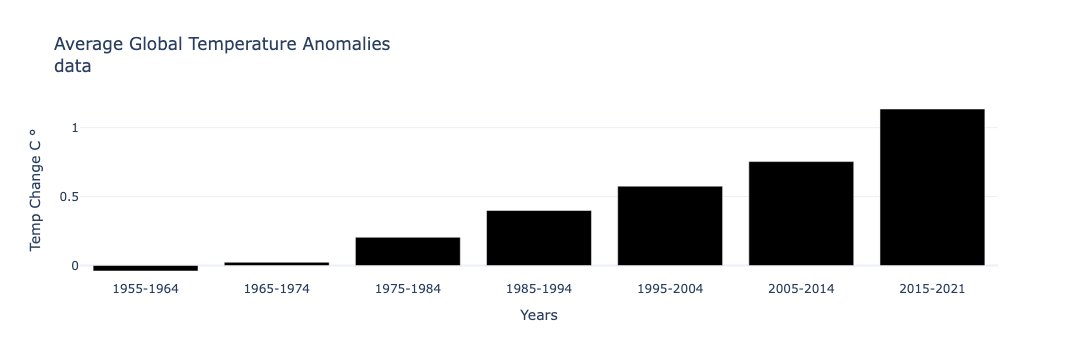

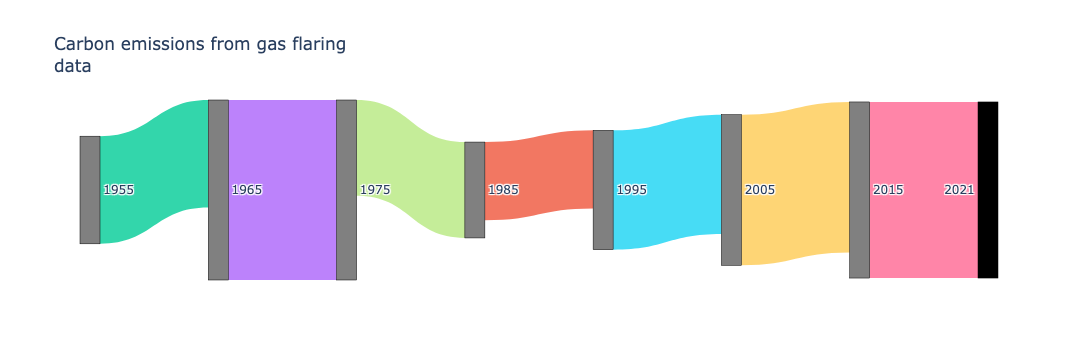

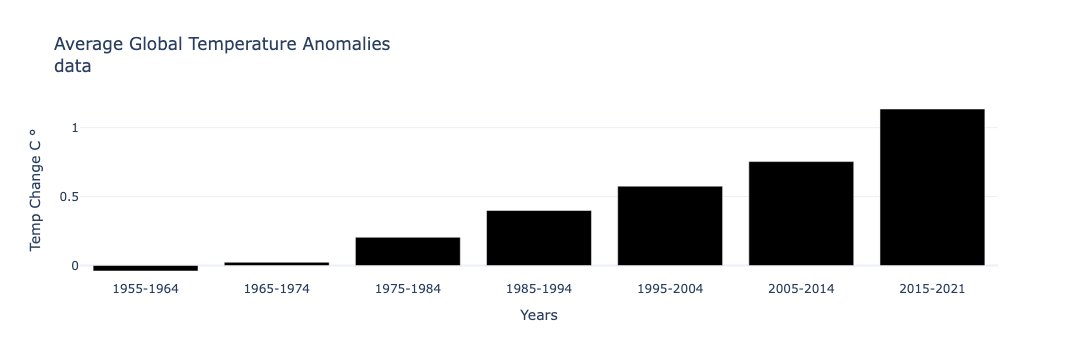

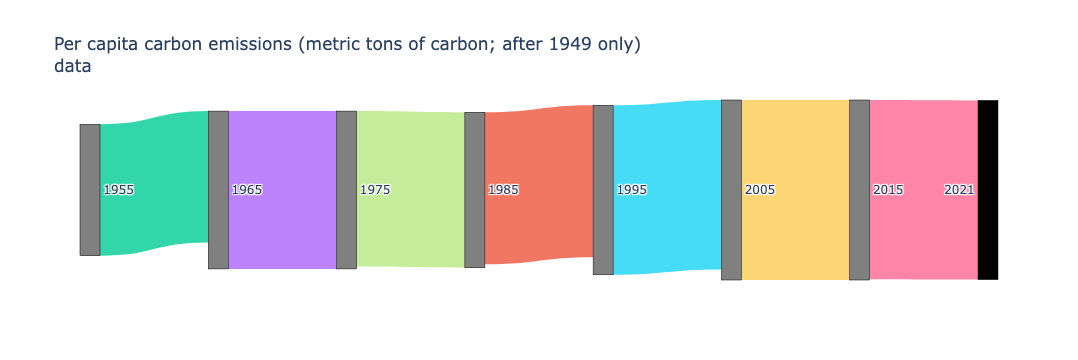

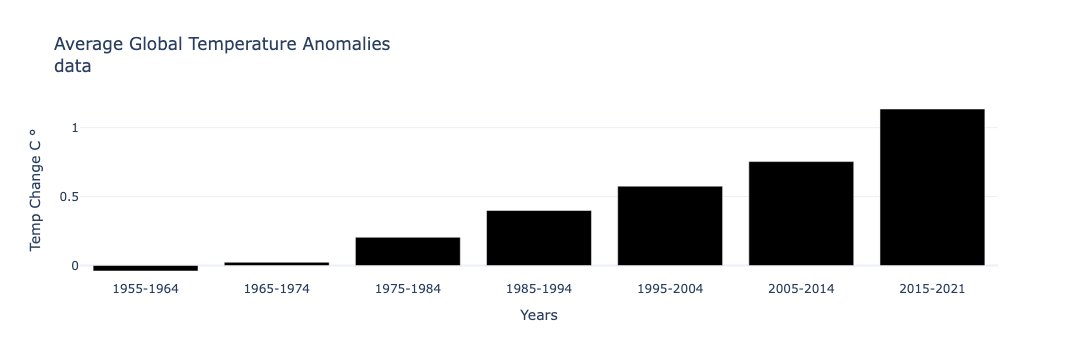

In [53]:
import plotly.graph_objects as go
import pandas as pd


def avg_net_temp_anomaly (df, year):
    start_year = int(year)
    # only have data up to 2021
    if start_year == 2015:
        end_year = 2021
    else:
        # most amounts are 9 year spread
        end_year = start_year + 9

    filtered_df = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    average = filtered_df["Anomaly"].sum()/6 if start_year == 2015 else filtered_df["Anomaly"].sum()/9
    return average
    
def get_global_temp_anomalies():
    # Global Temperatures
    # https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

    # remove 1st 3 lines from file
    df_temp_anomaly = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/'\
        'emissions/refs/heads/main/global-temp-anomaly-data.csv',skiprows=4)
    # print(df_temp_anomaly.head())
    
    temp_anomalies_averages = []
    anomaly_years = [ 1955, 1965, 1975, 1985,1995,2005,2015]
    
    for year in anomaly_years:
        total = avg_net_temp_anomaly(df_temp_anomaly,year)
        temp_anomalies_averages.append(total)
    
    label_years = ['1955-1964', '1965-1974', '1975-1984','1985-1994','1995-2004','2005-2014','2015-2021']
    
    # Create the bar chart
    fig2 = go.Figure(data=[
        go.Bar(x=label_years, y=temp_anomalies_averages, marker_color='black')
    ])
    
    # Update layout (optional)
    fig2.update_layout(
        title='Average Global Temperature Anomalies<br><a href="https://raw.githubusercontent.com/rebeccapeltz/emissions/refs/heads/main/global-temp-anomaly-data.csv" target="_blank">data</a>',
        xaxis_title='Years',
        yaxis_title='Temp Change C &#176;',
        template='plotly_white',
        xaxis=dict(tickformat='%Y', tickvals=label_years)
    )
    return fig2


fig2 = get_global_temp_anomalies()

def get_emissions(df_emissions,years:list,emission_name:str):
    '''
    returns a list of emmissions for specified years based on emmission_name
    '''
    return df_emissions[df_emissions['Year'].isin(years)][emission_name].tolist()


# Define the years you want to extract
years = [1965, 1975, 1985, 1995, 2005, 2015, 2021]

# Load the data (adjust the path/filename as needed)
df_emissions = pd.read_csv('https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv',header=0)
#print(type(df_emissions))
# Get list of all emission types


column_labels = list(df_emissions.columns)
#print(column_labels)
    
      

for emission_type in column_labels[1:]:
    # print(emission_type)


    # Extract the relevant data
    emissions = get_emissions(df_emissions,years,emission_type)
    #print(emissions)
    
    # Sample data
    data = {
        'source': [0, 1, 2, 3, 4, 5, 6],
        'target': [1, 2, 3, 4, 5, 6, 7],
        'value': emissions,
        'source_label': ['1955', '1965', '1975', '1985', '1995', '2005', '2015'],
        'target_label': ['1965', '1975', '1985', '1995', '2005', '2015', '2021'],
    }
    df = pd.DataFrame(data)
    
    # Optional: Create labels from source and target
    labels = list(pd.unique(df[['source_label', 'target_label']].values.ravel()))
    
    # Map labels to indexes
    label_map = {label: i for i, label in enumerate(labels)}
    df['source'] = df['source_label'].map(label_map)
    df['target'] = df['target_label'].map(label_map)
    
    # default colors
    
    colors =  ['rgba(0, 204, 150, 0.8)',
     'rgba(171, 99, 250, 0.8)',
     'rgba(182, 232, 128, 0.8)',
     'rgba(239, 85, 59, 0.8)',
     'rgba(25, 211, 243, 0.8)',
     'rgba(254, 203, 82, 0.8)',
     'rgba(255, 102, 146, 0.8)']
    
    # Carbon Emissions from Gas
    fig = go.Figure(data=[go.Sankey(
        arrangement='snap',
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
        ),
        link=dict(
            source=df['source'],
            target=df['target'],
            value=df['value'],
            color=colors
        )
    )])
    fig.update_traces(node_color = ['gray','gray','gray','gray','gray','gray','gray'])
    
    
    fig.update_layout(title_text=f"{emission_type}<br><a href='https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv' target='_blank'>data</a>", font_size=12)
    
    fig.show()
    fig2.show()



Scatterplot: Emissions vs Global Temperature Anomalies

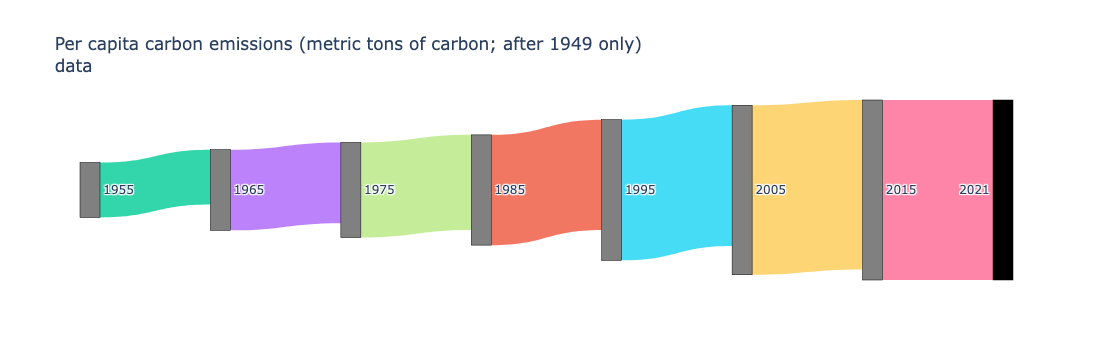

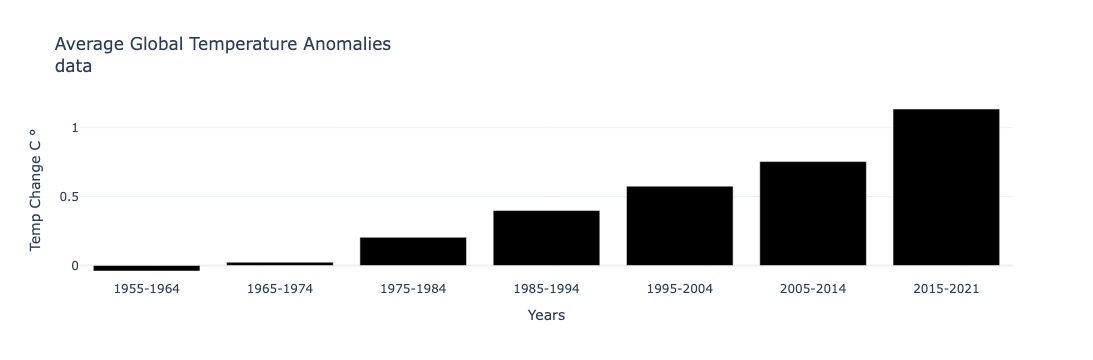

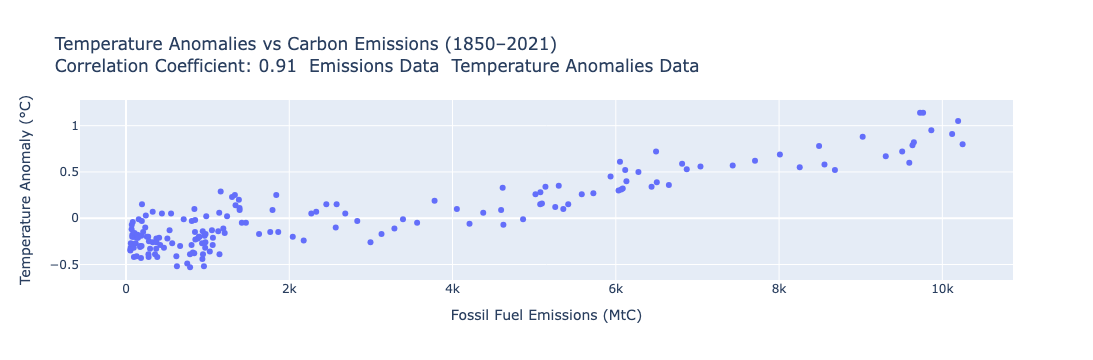

In [72]:
import plotly.express as px
import pandas as pd

start_year = 1850
end_year = 2021

# Emissions filtering
EMISSIONS_DATA = 'https://raw.githubusercontent.com/plotly/Figure-Friday/'\
        'refs/heads/main/2025/week-21/global.1751_2021.csv'
df_emission = pd.read_csv(EMISSIONS_DATA)

EMISSION_COL_NAME = 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
df_filtered_carbon_emissions_1850_2021 = df_emission[(df_emission['Year'] >= start_year) & (df_emission['Year'] <= end_year)]
#print(df_filtered_carbon_emissions_1850_2021[['Year', EMISSION_COL_NAME]])

# Temp Anomalies Filtering
TEMP_ANOMALIES_DATA = 'https://raw.githubusercontent.com/rebeccapeltz/'\
        'emissions/refs/heads/main/global-temp-anomaly-data.csv'
df_temp_anomaly = pd.read_csv(TEMP_ANOMALIES_DATA,comment='#')
ANOMALY_COL_NAME = 'Anomaly'
df_filtererd_temp_anomalies_1850_2021 = df_temp_anomaly[(df_temp_anomaly['Year'] >= start_year) & (df_temp_anomaly['Year'] <= end_year)]
#print(df_filtererd_temp_anomalies_1850_2021[['Year', ANOMALY_COL_NAME]])


# SANKEY CCHART


emissions = df_emissions[df_emissions['Year'].isin([1965, 1975, 1985, 1995, 2005, 2015, 2021])][EMISSION_COL_NAME].tolist()
data = {
    'source': [0, 1, 2, 3, 4, 5, 6],
    'target': [1, 2, 3, 4, 5, 6, 7],
    'value': emissions,
    'source_label': ['1955', '1965', '1975', '1985', '1995', '2005', '2015'],
    'target_label': ['1965', '1975', '1985', '1995', '2005', '2015', '2021'],
}
df = pd.DataFrame(data)

# Optional: Create labels from source and target
labels = list(pd.unique(df[['source_label', 'target_label']].values.ravel()))

# Map labels to indexes
label_map = {label: i for i, label in enumerate(labels)}
df['source'] = df['source_label'].map(label_map)
df['target'] = df['target_label'].map(label_map)

# default colors

colors =  ['rgba(0, 204, 150, 0.8)',
 'rgba(171, 99, 250, 0.8)',
 'rgba(182, 232, 128, 0.8)',
 'rgba(239, 85, 59, 0.8)',
 'rgba(25, 211, 243, 0.8)',
 'rgba(254, 203, 82, 0.8)',
 'rgba(255, 102, 146, 0.8)']

# Carbon Emissions from Gas
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=df['source'],
        target=df['target'],
        value=df['value'],
        color=colors
    )
)])
fig.update_traces(node_color = ['gray','gray','gray','gray','gray','gray','gray'])


fig.update_layout(title_text=f"{emission_type}<br><a href='https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv' target='_blank'>data</a>", font_size=12)

fig.show()



# BAR CHART

def avg_net_temp_anomaly (df, year):
    start_year = int(year)
    # only have data up to 2021
    if start_year == 2015:
        end_year = 2021
    else:
        # most amounts are 9 year spread
        end_year = start_year + 9

    filtered_df = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    average = filtered_df["Anomaly"].sum()/6 if start_year == 2015 else filtered_df["Anomaly"].sum()/9
    return average
    
def get_global_temp_anomalies():
    # Global Temperatures
    # https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

    # remove 1st 3 lines from file
    df_temp_anomaly = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/'\
        'emissions/refs/heads/main/global-temp-anomaly-data.csv',skiprows=4)
    # print(df_temp_anomaly.head())
    
    temp_anomalies_averages = []
    anomaly_years = [ 1955, 1965, 1975, 1985,1995,2005,2015]
    
    for year in anomaly_years:
        total = avg_net_temp_anomaly(df_temp_anomaly,year)
        temp_anomalies_averages.append(total)
    
    label_years = ['1955-1964', '1965-1974', '1975-1984','1985-1994','1995-2004','2005-2014','2015-2021']
    
    # Create the bar chart
    fig2 = go.Figure(data=[
        go.Bar(x=label_years, y=temp_anomalies_averages, marker_color='black')
    ])
    
    # Update layout (optional)
    fig2.update_layout(
        title='Average Global Temperature Anomalies<br><a href="https://raw.githubusercontent.com/rebeccapeltz/emissions/refs/heads/main/global-temp-anomaly-data.csv" target="_blank">data</a>',
        xaxis_title='Years',
        yaxis_title='Temp Change C &#176;',
        template='plotly_white',
        xaxis=dict(tickformat='%Y', tickvals=label_years)
    )
    return fig2


fig2 = get_global_temp_anomalies()
fig2.show()



# CORRELATION

# # Emissions filtering
# EMISSIONS_DATA = 'https://raw.githubusercontent.com/plotly/Figure-Friday/'\
#         'refs/heads/main/2025/week-21/global.1751_2021.csv'
# df_emission = pd.read_csv(EMISSIONS_DATA)

# EMISSION_COL_NAME = 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
# df_filtered_carbon_emissions_1850_2021 = df_emission[(df_emission['Year'] >= start_year) & (df_emission['Year'] <= end_year)]
# #print(df_filtered_carbon_emissions_1850_2021[['Year', EMISSION_COL_NAME]])

# # Temp Anomalies Filtering
# TEMP_ANOMALIES_DATA = 'https://raw.githubusercontent.com/rebeccapeltz/'\
#         'emissions/refs/heads/main/global-temp-anomaly-data.csv'
# df_temp_anomaly = pd.read_csv(TEMP_ANOMALIES_DATA,comment='#')
# ANOMALY_COL_NAME = 'Anomaly'
# df_filtererd_temp_anomalies_1850_2021 = df_temp_anomaly[(df_temp_anomaly['Year'] >= start_year) & (df_temp_anomaly['Year'] <= end_year)]
# #print(df_filtererd_temp_anomalies_1850_2021[['Year', ANOMALY_COL_NAME]])


# Merge both DataFrames on 'Year'
df_merged = pd.merge(df_filtered_carbon_emissions_1850_2021, df_filtererd_temp_anomalies_1850_2021, on='Year')

# Get Correllation Coefficient
correlation = df_filtered_carbon_emissions_1850_2021[EMISSION_COL_NAME].corr(df_filtererd_temp_anomalies_1850_2021[ANOMALY_COL_NAME])

plot_title = 'Temperature Anomalies vs Carbon Emissions (1850–2021)'\
          f'<br>Correlation Coefficient: {correlation:.2f}'\
          f'  <a href="{EMISSIONS_DATA}" target=_blank>Emissions Data</a>'\
          f'  <a href="{TEMP_ANOMALIES_DATA}" target=_blank>Temperature Anomalies Data</a>'

# Plot scatterplot
fig = px.scatter(
    df_merged,
    x=EMISSION_COL_NAME,
    y=ANOMALY_COL_NAME,
    labels={
        EMISSION_COL_NAME: "Fossil Fuel Emissions (MtC)",
        ANOMALY_COL_NAME: "Temperature Anomaly (°C)"
    },
    title=plot_title
)

fig.show()
